In [6]:
import cv2
import numpy as np
import glob
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def get_dynamic_image(frames, normalized=True):
    """ Takes a list of frames and returns either a raw or normalized dynamic image."""
    num_channels = frames[0].shape[2]
    channel_frames = _get_channel_frames(frames, num_channels)
    channel_dynamic_images = [_compute_dynamic_image(channel) for channel in channel_frames]

    dynamic_image = cv2.merge(tuple(channel_dynamic_images))
    if normalized:
        dynamic_image = cv2.normalize(dynamic_image, None, 0, 255, norm_type=cv2.NORM_MINMAX)
        dynamic_image = dynamic_image.astype('uint8')

    return dynamic_image


def _get_channel_frames(iter_frames, num_channels):
    """ Takes a list of frames and returns a list of frame lists split by channel. """
    frames = [[] for channel in range(num_channels)]

    for frame in iter_frames:
        for channel_frames, channel in zip(frames, cv2.split(frame)):
            channel_frames.append(channel.reshape((*channel.shape[0:2], 1)))
    for i in range(len(frames)):
        frames[i] = np.array(frames[i])
    return frames


def _compute_dynamic_image(frames):
    """ Adapted from https://github.com/hbilen/dynamic-image-nets """
    num_frames, h, w, depth = frames.shape

    # Compute the coefficients for the frames.
    coefficients = np.zeros(num_frames)
    for n in range(num_frames):
        cumulative_indices = np.array(range(n, num_frames)) + 1
        coefficients[n] = np.sum(((2*cumulative_indices) - num_frames) / cumulative_indices)

    # Multiply by the frames by the coefficients and sum the result.
    x1 = np.expand_dims(frames, axis=0)
    x2 = np.reshape(coefficients, (num_frames, 1, 1, 1))
    result = x1 * x2
    return np.sum(result[0], axis=0).squeeze()


def get_video_frames(video_path):
    # Initialize the frame number and create empty frame list
    video = cv2.VideoCapture(video_path)
    frame_list = []

    # Loop until there are no frames left.
    try:
        while True:
            more_frames, frame = video.read()

            if not more_frames:
                break
            else:
                frame_list.append(frame)

    finally:
        video.release()

    return frame_list

In [9]:
def main():
    # Load the frames from the 'example_frames' folder and sort them numerically. This assumes that your frames
    # are enumerated as 0001.jpg, 0002.jpg, etc.
    frames = glob.glob('example_frames\\*.jpg')
    print(frames)
    frames = sorted(frames, key=lambda x: int(x.split("\\")[1].split("_")[1]))
    frames = [cv2.imread(f) for f in frames]

    # Generate and display a normalized dynamic image.
    dyn_image = get_dynamic_image(frames, normalized=True)
    plt.imshow(dyn_image)
    #cv2.imshow('', dyn_image)
    cv2.waitKey()

['example_frames\\vNonPorn207_10_3_2.jpg', 'example_frames\\vNonPorn207_11_3_3.jpg', 'example_frames\\vNonPorn207_12_3_4.jpg', 'example_frames\\vNonPorn207_1_1_1.jpg', 'example_frames\\vNonPorn207_2_1_2.jpg', 'example_frames\\vNonPorn207_3_1_3.jpg', 'example_frames\\vNonPorn207_4_1_4.jpg', 'example_frames\\vNonPorn207_5_2_1.jpg', 'example_frames\\vNonPorn207_6_2_2.jpg', 'example_frames\\vNonPorn207_7_2_3.jpg', 'example_frames\\vNonPorn207_8_2_4.jpg', 'example_frames\\vNonPorn207_9_3_1.jpg']


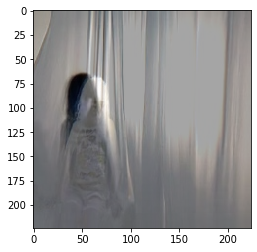

In [10]:
main()